In [1]:
from utilities import * 

In [2]:
def correlationByMonth(year):
    fires, aqi = load_data_year(year)
    fires_ = get_fires(df = fires, year=year)
    fires_["MONTH"] = pd.DatetimeIndex(fires_['DISCOVERY_DATE']).month
    fires_["DURATION"] = (pd.to_datetime(fires_["CONT_DATE"]) - pd.to_datetime(fires_["DISCOVERY_DATE"]))
    columns=["COUNTY_NAME", "MONTH", "DURATION", "FIRE_SIZE"]
    fires_ = fires_[columns]
    # print(fires_.shape)
    fires_ = fires_.dropna(subset = ["COUNTY_NAME", "MONTH"])
    # print(fires_.shape)

    fires_["DURATION"] = fires_["DURATION"].dt.days

    fires_["DURATION"] += 1.0
    duration = fires_["DURATION"]

    # If there is a missing value in dates, we assume it last for 2 days
    fires_["DURATION"] = fires_["DURATION"].fillna(2.0)
    # If the fire size is unavailabe, we assume it to be 0.5
    fires_["FIRE_SIZE"] = fires_["FIRE_SIZE"].fillna(0.5)
    fires_["FIRE_SUM"] = fires_["DURATION"] * fires_["FIRE_SIZE"]

    columns = ["COUNTY_NAME", "MONTH", "FIRE_SUM"]
    fires_ = fires_[columns]
    fires_groupBy = fires_.groupby(["COUNTY_NAME", "MONTH"])["FIRE_SUM"].sum().reset_index()

    aqi_ = aqi
    aqi_["MONTH"] = pd.DatetimeIndex(aqi_['DATE']).month
    columns = ["COUNTY_NAME", "MONTH", "AQI"]
    aqi_1 = aqi_[columns]
    #aqi_.rename(columns = {"COUNTY_NAME": "COUNTY_NAME"}, inplace = True)
    aqi_groupBy = aqi_1.groupby(["COUNTY_NAME", "MONTH"]).mean().reset_index()

    correlation = pd.DataFrame.merge(fires_groupBy, aqi_groupBy, how = "inner")

    return correlation
    


From the scatter plot,  we can tell that the major factor of high AQI is not due to wildfire. Even though, there's occurance of huge wildfires, the AQI does not result in drastic increase.

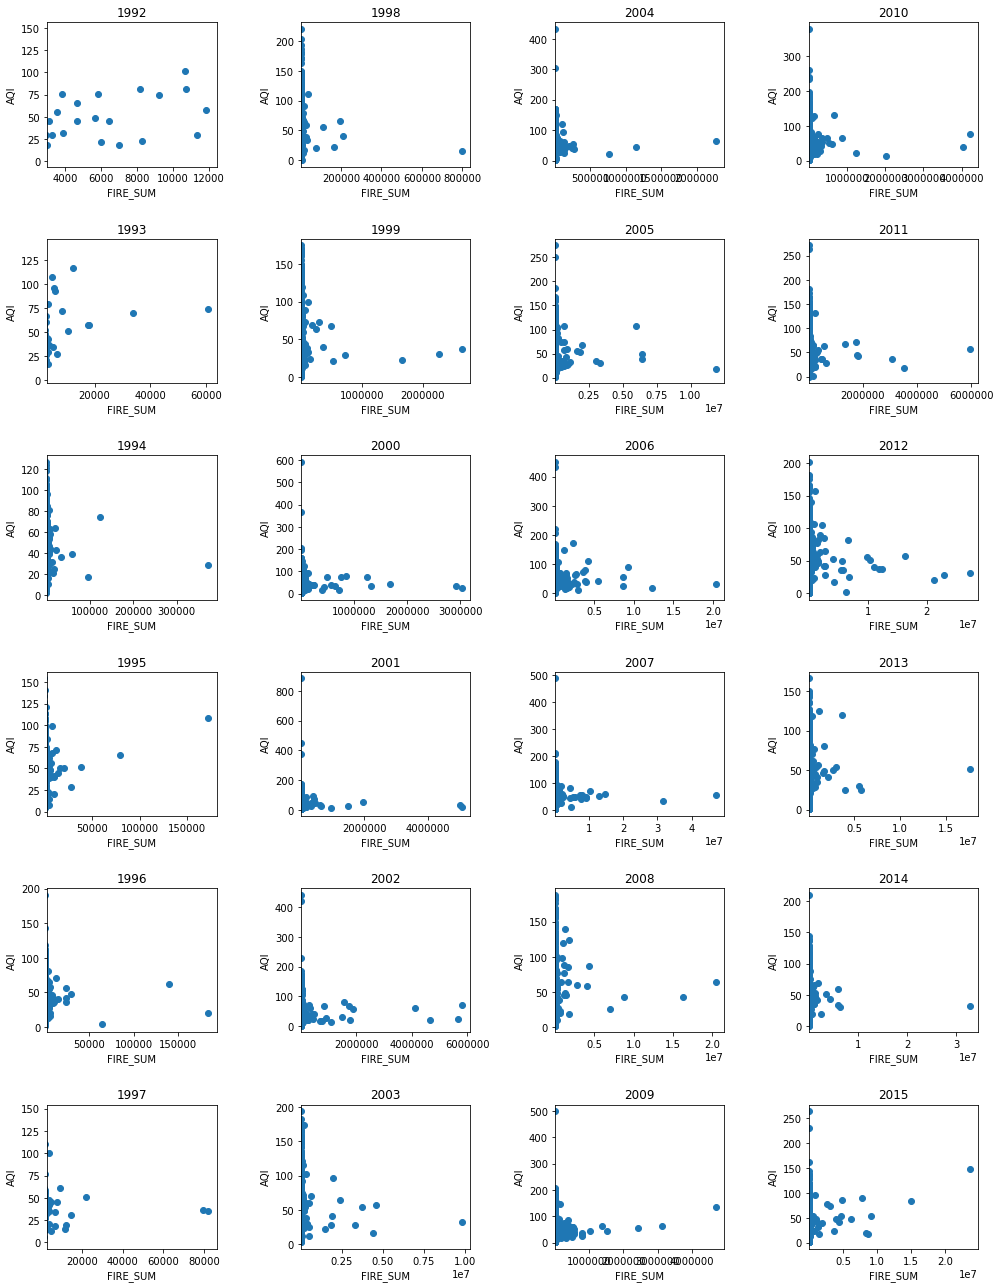

In [49]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

years = list(range(1992, 2016))

fig, ax = plt.subplots(6, 4, figsize = (14, 18))

for i, year in enumerate(years):
    correlation = correlationByMonth(year)
    X = np.array(correlation["FIRE_SUM"])
    y = np.array(correlation["AQI"])
    ax_ = ax[i%6, i//6]
    ax_.scatter(X, y)
    ax_.set_xlabel('FIRE_SUM')
    ax_.set_ylabel('AQI')
    ax_.set_xlim(left = 3000)
    ax_.set_title(year)
fig.tight_layout()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

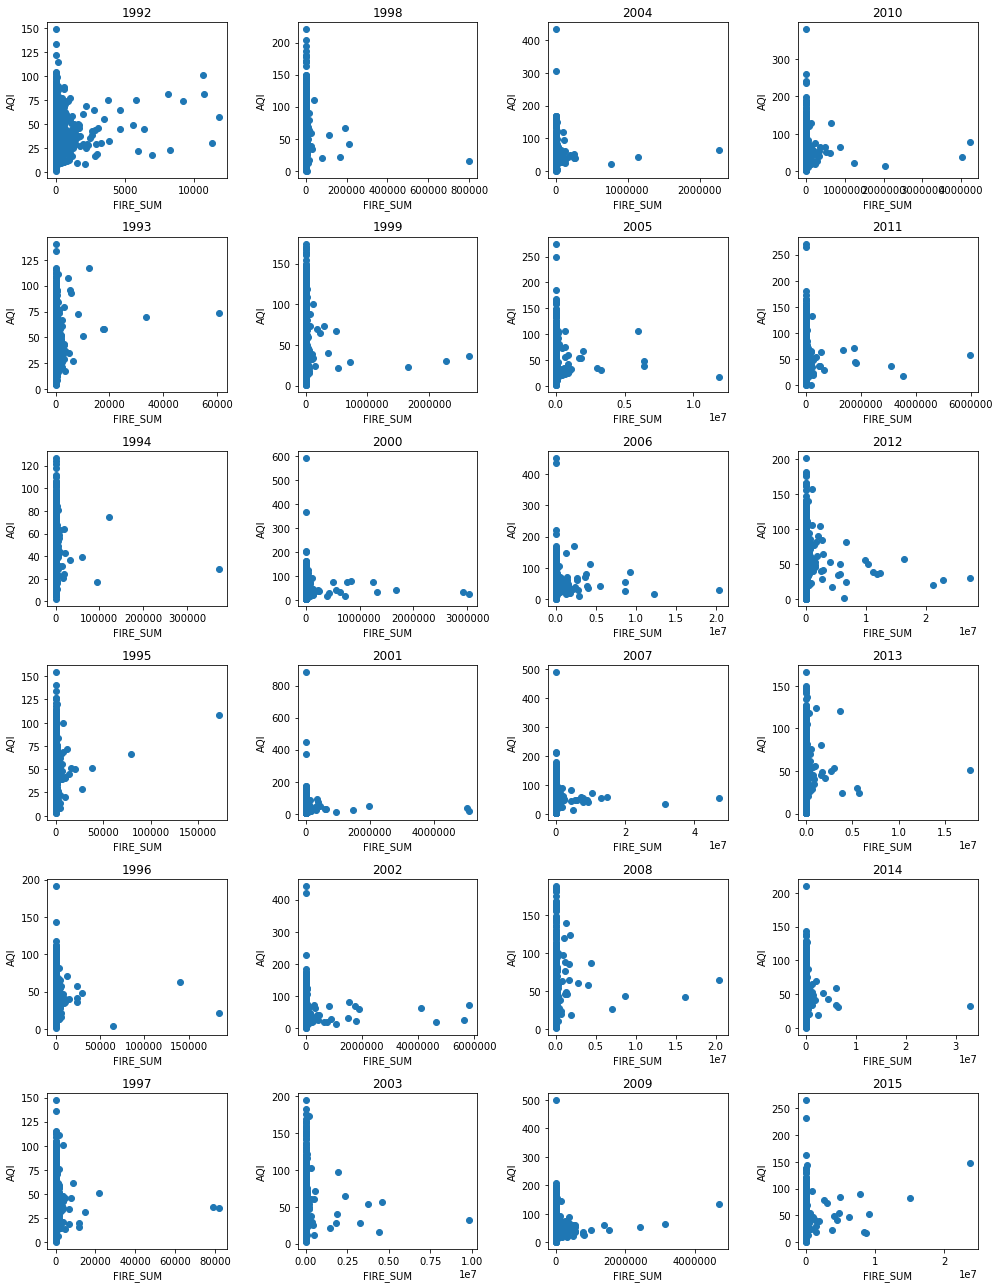

In [47]:
fig, ax = plt.subplots(6, 4, figsize = (14, 18))

for i, year in enumerate(years):
    correlation = correlationByMonth(year)
    X = np.array(correlation["FIRE_SUM"])
    y = np.array(correlation["AQI"])
    ax_ = ax[i%6, i//6]
    ax_.scatter(X, y)
    ax_.set_xlabel('FIRE_SUM')
    ax_.set_ylabel('AQI')
    ax_.set_title(year)
fig.tight_layout()